In [57]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn import preprocessing

In [58]:
student = pd.read_csv('student-mat.csv')

In [59]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Data Analysis throught graph

16    104
17     98
15     82
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64
1.6282850350189455


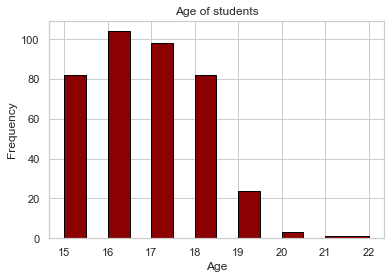

In [60]:
import matplotlib.pyplot as plt

# Table of age counts
age_table = student['age'].value_counts()
print(age_table)

# Variance of age
age_variance = student['age'].var()
print(age_variance)

# Histogram of age
age = plt.hist(student['age'], bins=int((max(student['age']) - min(student['age'])) / 0.50),
               color='darkred', edgecolor='black')
plt.title("Age of students")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


#             - Do Girls Perform Better in School?
We will explore gender differences in the classroom with respect to G1 ( first period grade).

We will:

1) check the number of female and male students in the school.

2) Examine the performance in class based on gender and age by replying to the following questions:

a) Who does better at school? Do girls perform better or do boys gets better results than girls?

b) Does students performance gets better with age?

F    208
M    187
Name: sex, dtype: int64


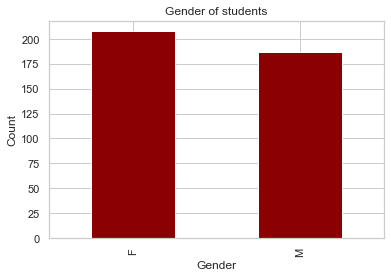

In [61]:
# Table of gender counts
gender_table = student['sex'].value_counts()
print(gender_table)

# Bar plot of gender
gender = student['sex'].value_counts().plot(kind='bar', color='darkred')
plt.title("Gender of students")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

We notice that there are more female students (208) than male students (187).

5    146
3     91
4     66
1     47
2     45
Name: health, dtype: int64


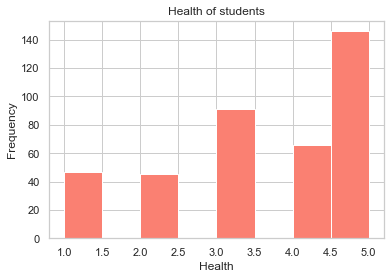

In [62]:
# Table of health counts
health_table = student['health'].value_counts()
print(health_table)

# Histogram of health
health = plt.hist(student['health'], bins=int((max(student['health']) - min(student['health'])) / 0.5),
               color='salmon')
plt.title("Health of students")
plt.xlabel("Health")
plt.ylabel("Frequency")
plt.show()

We can see that the majority of the students are in good health

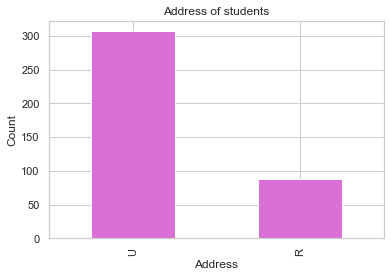

In [63]:
# Bar plot of address
area = student['address'].value_counts().plot(kind='bar', color='orchid')
plt.title("Address of students")
plt.xlabel("Address")
plt.ylabel("Count")
plt.show()

as clearly seen aboce most of the students live in urban areas

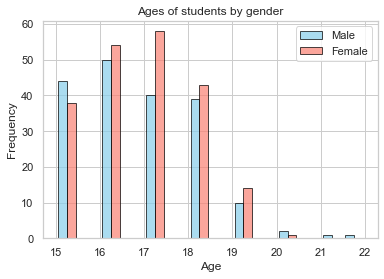

In [64]:

# Histogram of ages with separate colors for males and females
ages = plt.hist([student[student['sex'] == 'M']['age'], student[student['sex'] == 'F']['age']],
                bins=int((max(student['age']) - min(student['age'])) / 0.50),
                color=['skyblue', 'salmon'], label=['Male', 'Female'], edgecolor='black', alpha=0.7)
plt.title("Ages of students by gender")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Intresting! As it clearly shown in the graph above, most of the students older than 18 are male students as there no female students older than 20 years old.

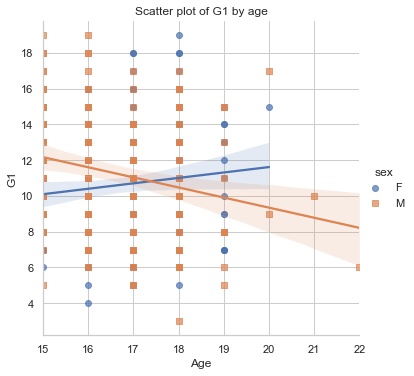

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of G1 by age, differentiated by sex
g1_plot = sns.lmplot(data=student, x='age', y='G1', hue='sex', markers=['o', 's'], legend=True,
                     scatter_kws={'alpha': 0.7})
g1_plot.set(title='Scatter plot of G1 by age', xlabel='Age', ylabel='G1')
plt.show()


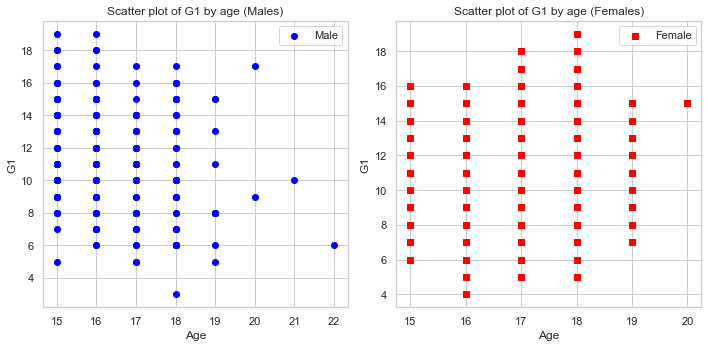

In [66]:
import matplotlib.pyplot as plt

# Scatter plots of G1 by age for males and females
males = student[student['sex'] == 'M']
females = student[student['sex'] == 'F']

plt.figure(figsize=(10, 5))

# Scatter plot for males
plt.subplot(1, 2, 1)
plt.scatter(males['age'], males['G1'], color='blue', marker='o', label='Male')
plt.title('Scatter plot of G1 by age (Males)')
plt.xlabel('Age')
plt.ylabel('G1')
plt.legend()

# Scatter plot for females
plt.subplot(1, 2, 2)
plt.scatter(females['age'], females['G1'], color='red', marker='s', label='Female')
plt.title('Scatter plot of G1 by age (Females)')
plt.xlabel('Age')
plt.ylabel('G1')
plt.legend()

plt.tight_layout()
plt.show()


We can see that girls performance gets better with age, however, a decrease in the boys performance could be detected in the graph above.

A meta-analysis published by the American Psychological Association examines gender differences in schools across 300 countries and over nearly one hundred years. And it turns out girls have been getting better grades than boys for decades. Girls not only do markedly better in language classes, but they also outperform boys in math and science. (The female advantage in school performance in math and science does not appear until the adolescent years.

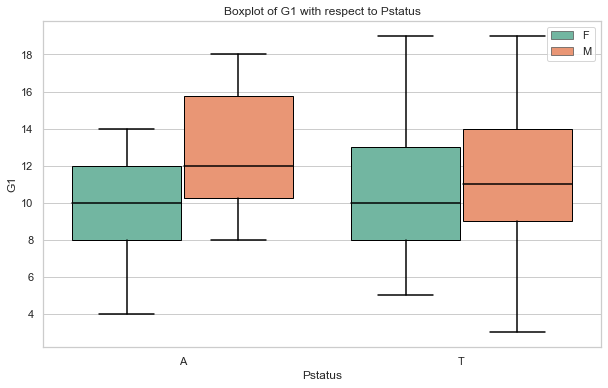

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of G1 by Pstatus, differentiated by sex
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Boxplot
boxplot = sns.boxplot(data=student, x='Pstatus', y='G1', hue='sex', palette='Set2')
boxplot.set(title='Boxplot of G1 with respect to Pstatus', xlabel='Pstatus', ylabel='G1')

# Customize plot aesthetics
plt.setp(boxplot.artists, edgecolor='black', linewidth=1)
plt.setp(boxplot.lines, color='black')


plt.legend()
plt.show()


Looking at the boxplot above, we can deduce that the median of the girls G1 is at around 10 and for the boys it is at around 12-13 and it is clear how boys and girls whose parents are T ( Together) score higher than their peers with divorced parents.


# Create heatmap 

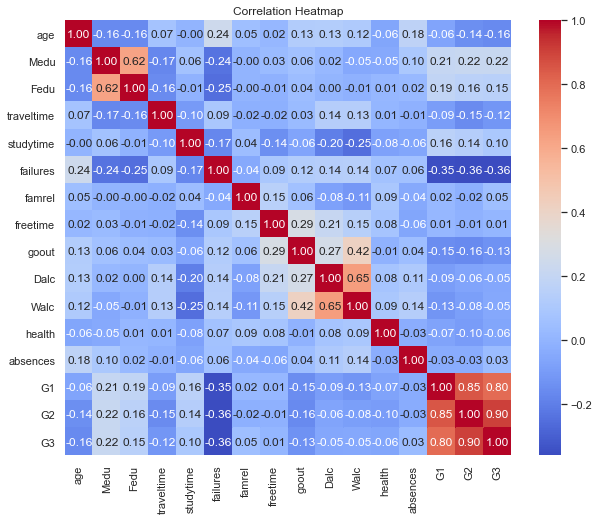

In [68]:

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(student.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In this heatmap, we can examine and analyse the relationship between our features and how our variables are correlated with each other.

As shown in the scale, our correlation varies between 1 (positive correlation) and -1 ( negative correlation). The red the color is the high correlated our features are, Example of:

Positive correlation: G1 and G3

Negative correlation: failures and study time show negative correlation

# Analysis of student data type and non-null count

In [69]:
print(student.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Handeling missing value

In [70]:
student.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [81]:
import pandas as pd

# Assuming 'df' is your DataFrame
object_columns = student.select_dtypes(include=['object']).columns
student.drop(object_columns, axis=1, inplace=True)


In [82]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         395 non-null    int64
 1   Medu        395 non-null    int64
 2   Fedu        395 non-null    int64
 3   traveltime  395 non-null    int64
 4   studytime   395 non-null    int64
 5   failures    395 non-null    int64
 6   famrel      395 non-null    int64
 7   freetime    395 non-null    int64
 8   goout       395 non-null    int64
 9   Dalc        395 non-null    int64
 10  Walc        395 non-null    int64
 11  health      395 non-null    int64
 12  absences    395 non-null    int64
 13  G1          395 non-null    int64
 14  G2          395 non-null    int64
 15  G3          395 non-null    int64
dtypes: int64(16)
memory usage: 49.5 KB


# train_test_split

In [86]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(1234)  # Set the random seed for reproducibility

# Split the data into training and test datasets
X = student.drop(['G3'
                 ], axis=1)  # Features (all columns except 'G3')
y = student['G3']  # Target variable ('G3')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# LinearRegression

In [87]:
from sklearn.linear_model import LinearRegression

# Create the linear regression model
lin_mod = LinearRegression()

# Fit the model on the training data
lin_mod.fit(X_train, y_train)


LinearRegression()

In [88]:
# Make predictions on the test data
pred_test = lin_mod.predict(X_test)

In [89]:
pred_test

array([ 9.67841788, 10.03976384, 11.21853715, 16.36550219, 14.84876366,
        5.98714892,  7.64609505,  9.784268  ,  3.77484604,  4.40197272,
       14.90440522, 12.28975937, 15.42693955,  8.99432381, 11.42473284,
       15.10681759, 18.85743928,  9.30378201, -0.74180598, 11.67261867,
        5.05113602,  9.08998986,  7.81247407, 16.05258544,  7.32571581,
       17.12043572, 14.87269579,  9.39781618,  9.38687782,  6.07743915,
        7.92745935, 12.16637276, 18.95144573, 15.00241138,  8.89196019,
        9.83499284,  9.06157674,  5.10321579, 13.74656113, 10.08598798,
       18.2503324 , 12.18342244,  7.73463083,  5.60582856, 12.40169024,
        5.85066737,  8.49149944,  4.87687955,  8.77661364,  8.12148459,
       10.83720907, 17.51590514, 12.31529742,  7.97194878, 15.87794695,
       10.53224552, 13.07799073,  6.91194337,  9.71988582, 18.6931573 ,
        9.04904671,  3.98997932,  6.3704725 ,  6.19461289, 12.34401433,
        9.01501534, 10.28885004,  8.45699624, 15.67368287, 14.07

# Calculate the MAE

In [100]:
from sklearn.metrics import mean_absolute_error

# Reshape the pred_test array to a single column
pred_test = pred_test.reshape(-1, 1)

# Calculate the MAE
mae = mean_absolute_error(y_test, pred_test)

# Print the result
print("Test MAE:", round(mae, 6))

Test MAE: 1.30715
